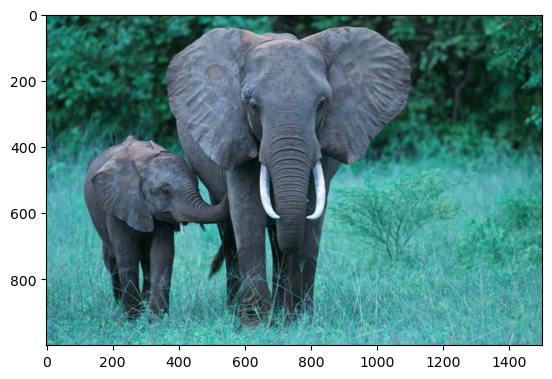

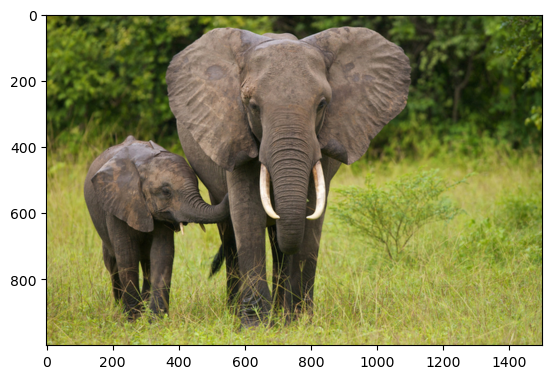

True

In [1]:
import cv2 as cv2 # this imports OpenCV
import numpy as np # this imports numpy
import matplotlib.pyplot as plt

################################ Part 2 TASK 2 ######################################

# Load Images using cv2
elephant_image = cv2.imread('/Users/fneba/elephant.jpeg', cv2.IMREAD_COLOR)

# Display Images using matplotlib pt. 1
plt.imshow(elephant_image)
plt.show()

# Write Image to 'elephant_opencv.png'
cv2.imwrite('elephant_opencv.png', elephant_image)

# Convert loaded image to RGB
elephant = cv2.cvtColor(elephant_image, cv2.COLOR_BGR2RGB)

# Display Images using matplotlib pt. 2
plt.imshow(elephant)
plt.show()

# Write Image to 'elephant_matplotlib.png'
cv2.imwrite('elephant_matplotlib.png', elephant)

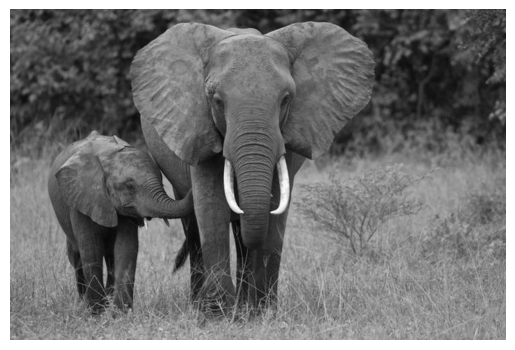

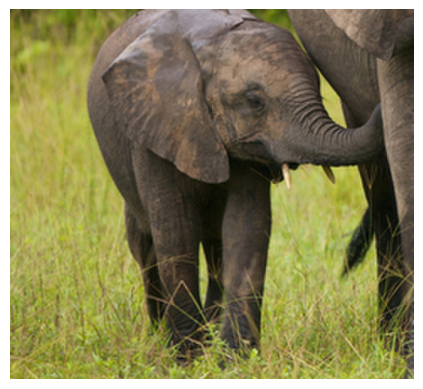

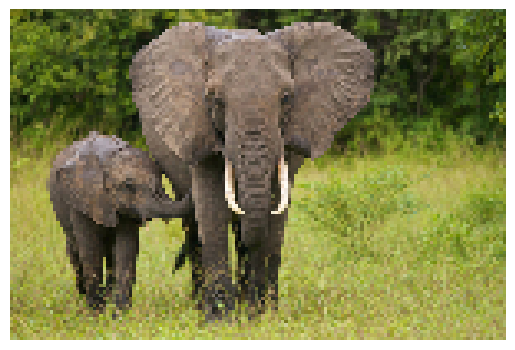

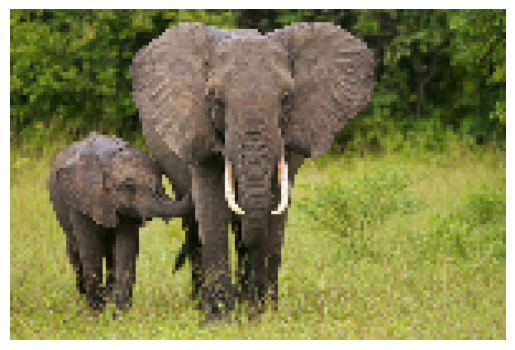

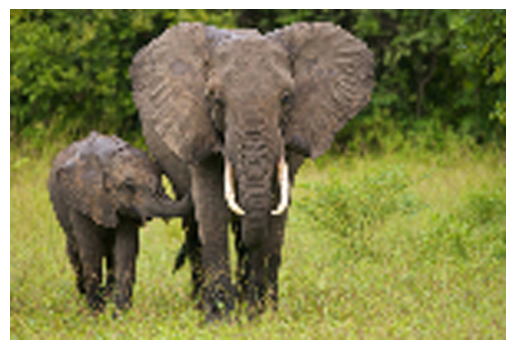

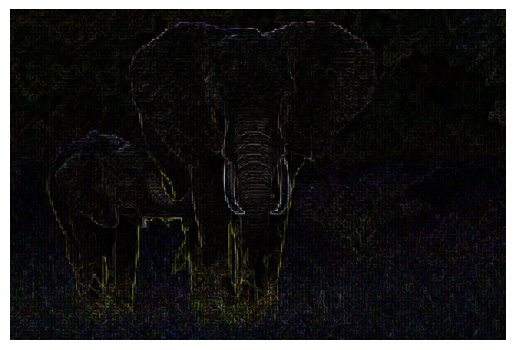

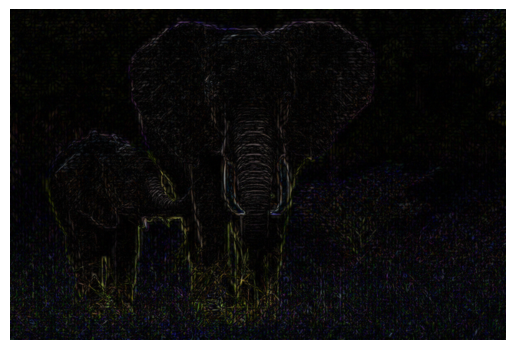

In [2]:
######################## Part 2 Task 3 ###########################

# Convert recent result to grayscale
elephant_gray = cv2.cvtColor(elephant, cv2.COLOR_BGR2GRAY)

plt.imshow(elephant_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Write Image to 'elephant_gray.png'
cv2.imwrite('elephant_gray.png', elephant_gray)


###### CROPPING
# Crop and display the baby elephant in regular color
elephant_cropped = elephant[400:950, 0:600]

plt.imshow(elephant_cropped)
plt.axis('off')
plt.show()

# Write Image to 'elephant_baby.png'
cv2.imwrite('elephant_baby.png', elephant_cropped)

###### RESIZING 

### part a

# resizing, display, and write to 'elephant_10xdown.png'
elephant_10xdown = cv2.resize(elephant, None, fx=0.1, fy=0.1)
plt.imshow(elephant_10xdown)
plt.axis('off')
plt.show()
cv2.imwrite('elephant_10xdown.png', elephant_10xdown)

### part b 
# nearest neighbor
elephant_10xupNearest = cv2.resize(elephant_10xdown, None, fx=10, fy=10, interpolation = cv2.INTER_NEAREST)
plt.imshow(elephant_10xupNearest)
plt.axis('off')
plt.show()
cv2.imwrite('elephant_10xup_NearestNeighbor.png', elephant_10xupNearest)

# bicubic
elephant_10xupBicubic = cv2.resize(elephant_10xdown, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
plt.imshow(elephant_10xupBicubic)
plt.axis('off')
plt.show()
cv2.imwrite('elephant_10xup_Bicubic.png', elephant_10xupBicubic)

### part c
# ground truth image and nearest neighbor resizing absolute diff and write out
NNad = cv2.absdiff(elephant, elephant_10xupNearest)
plt.imshow(NNad)
plt.axis('off')
plt.show()
cv2.imwrite('AbsDiff_Nearest.png', NNad)

# ground truth image and bicubic resizing absolute diff and write out
BCad = cv2.absdiff(elephant, elephant_10xupBicubic)
plt.imshow(BCad)
plt.axis('off')
plt.show()
cv2.imwrite('AbsDiff_Bicubic.png', BCad)

# Sum for pixels in NNad
sum_NNad = cv2.sumElems(NNad)
numeric_sum_NNad = sum(sum_NNad[:3])

# Sum for pixels in BCad
sum_BCad = cv2.sumElems(BCad)
numeric_sum_BCad = sum(sum_BCad[:3])



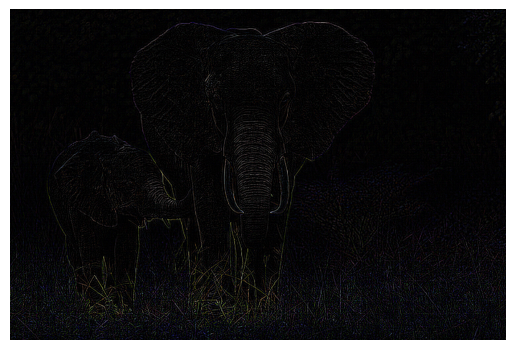

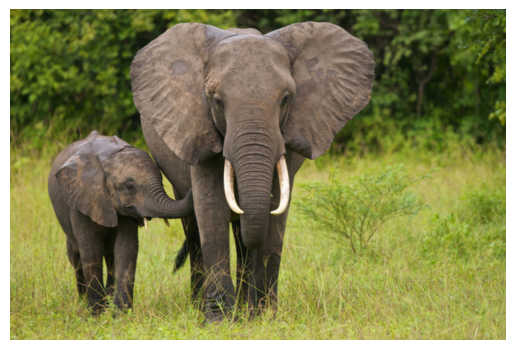

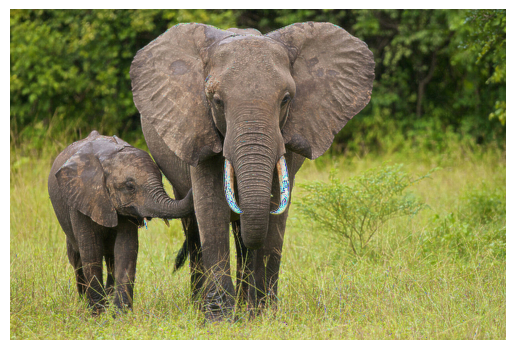

In [3]:
######################## Part 2 Task 4 ###########################
edgeDetectKernel = np.array([[-1, -1, -1],
                             [-1, 8, -1],
                             [-1, -1, -1]])
blurKernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]])/16

# Edge detect function
def edgeDetect(image):
    
    # Apply the kernel to image using 2D convolution
    edges = cv2.filter2D(image, -1, edgeDetectKernel)
    
    return edges

# Blur function
def blur(image):

    # Apply the kernel to image using 2D convolution
    blurred = cv2.filter2D(image, -1, blurKernel)
    
    return blurred

# Display images
elephant_edges = edgeDetect(elephant)
plt.imshow(elephant_edges)
plt.axis('off')
plt.show()

blurred_elephant = blur(elephant)
plt.imshow(blurred_elephant)
plt.axis('off')
plt.show()

combo = elephant_edges + blurred_elephant
plt.imshow(combo)
plt.axis('off')
plt.show()

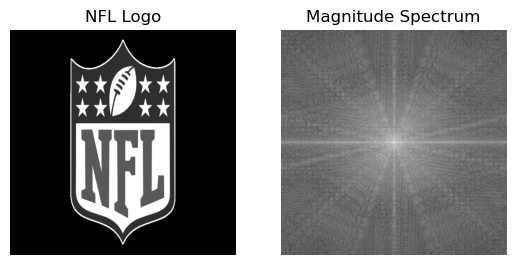

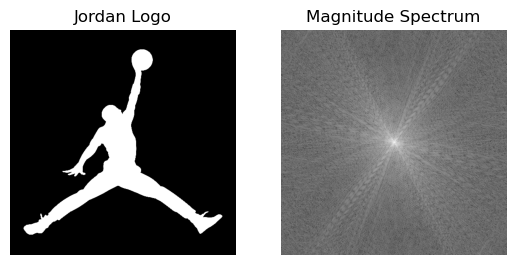

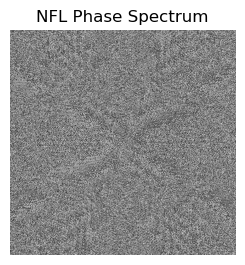

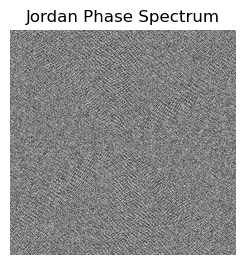

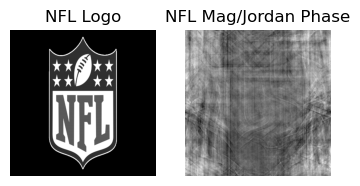

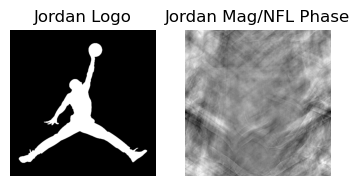

In [4]:
########################### Part 3 Task 1 #################################

# Load images
NFL_unsized = cv2.imread('/Users/fneba/NFL.jpeg', 0)
Jordan_unsized = cv2.imread('/Users/fneba/Jordan.jpeg', 0)

# resized images for later
NFL = cv2.resize(NFL_unsized, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
Jordan = cv2.resize(Jordan_unsized, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)

#Compute fourier transforms
NFL_Fourier = np.fft.fft2(NFL)
Jordan_Fourier = np.fft.fft2(Jordan)

# Shift the zero-frequency component to the center of the spectrum
NFL_fshift = np.fft.fftshift(NFL_Fourier)
Jordan_fshift = np.fft.fftshift(Jordan_Fourier)

# Compute phase images
NFL_phase = np.angle(NFL_fshift)
Jordan_phase = np.angle(Jordan_fshift)

## unshifted phase images for later
NFL_phase_unshifted = np.angle(NFL_Fourier)
Jordan_phase_unshifted = np.angle(Jordan_Fourier)

#Compute magnitude images
NFL_magnitude_spectrum = 20*np.log(np.abs(NFL_fshift))
Jordan_magnitude_spectrum = 20*np.log(np.abs(Jordan_fshift))

# Display Magnitude images
plt.subplot(121),plt.imshow(NFL, cmap = 'gray')
plt.title('NFL Logo'), plt.axis('off')
plt.subplot(122),plt.imshow(NFL_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

plt.subplot(121),plt.imshow(Jordan, cmap = 'gray')
plt.title('Jordan Logo'), plt.axis('off')
plt.subplot(122),plt.imshow(Jordan_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

# Display Phase images
plt.subplot(122), plt.imshow(NFL_phase, cmap='gray')
plt.title('NFL Phase Spectrum'), plt.axis('off')
plt.show()

plt.subplot(122), plt.imshow(Jordan_phase, cmap='gray')
plt.title('Jordan Phase Spectrum'), plt.axis('off')
plt.show()

### Swap phase, inverse FT and reconstruct (Source used: https://numpy.org/doc/stable/reference/routines.fft.html)

# NFL Logo w/ Jordan phase
NFL_mag_Jordan_phase = np.multiply(NFL_Fourier, np.exp(1j*Jordan_phase_unshifted))
NFLordan = np.real(np.fft.ifft2(NFL_mag_Jordan_phase))

plt.subplot(131),plt.imshow(NFL, cmap = 'gray')
plt.title('NFL Logo'), plt.axis('off')
plt.subplot(132),plt.imshow(NFLordan, cmap = 'gray')
plt.title('NFL Mag/Jordan Phase'), plt.axis('off')
plt.show()

# Jordan Logo w/ NFL phase
Jordan_mag_NFL_phase = np.multiply(Jordan_Fourier, np.exp(1j*NFL_phase_unshifted))
JorNFL = np.real(np.fft.ifft2(Jordan_mag_NFL_phase))

plt.subplot(131),plt.imshow(Jordan, cmap = 'gray')
plt.title('Jordan Logo'), plt.axis('off')
plt.subplot(132),plt.imshow(JorNFL, cmap = 'gray')
plt.title('Jordan Mag/NFL Phase'), plt.axis('off')
plt.show()



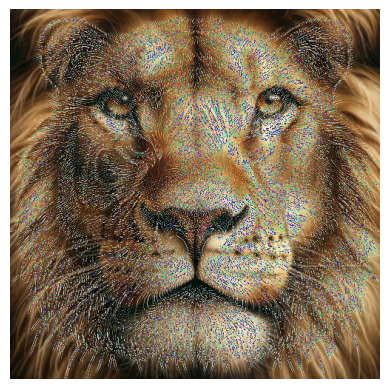

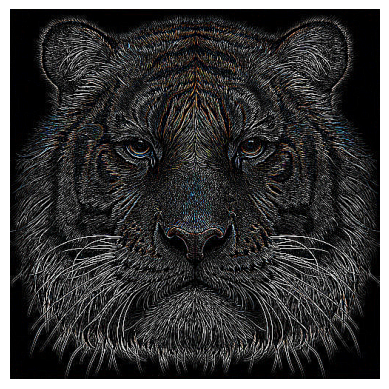

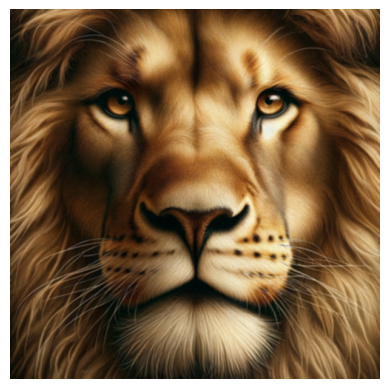

In [5]:
########################### Part 3 Task 2 #################################

# load images
Lion = cv2.imread('/Users/fneba/Lion.jpg', cv2.IMREAD_COLOR)
Tiger = cv2.imread('/Users/fneba/Tiger.jpg', cv2.IMREAD_COLOR)

# Convert to RGB
Tiger_RGB = cv2.cvtColor(Tiger, cv2.COLOR_BGR2RGB)
Lion_RGB = cv2.cvtColor(Lion, cv2.COLOR_BGR2RGB)

# Use blur and edgedetect functions from earlier
Tiger_edges = edgeDetect(Tiger_RGB)
Lion_blur = blur(Lion_RGB)

# combine and display result
Result = Lion_blur + Tiger_edges

plt.imshow(Result)
plt.axis('off')
plt.show()

plt.imshow(Tiger_edges)
plt.axis('off')
plt.show()

plt.imshow(Lion_blur)
plt.axis('off')
plt.show()


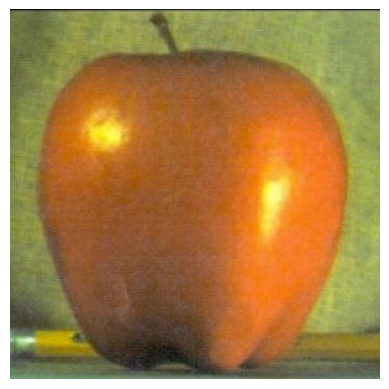

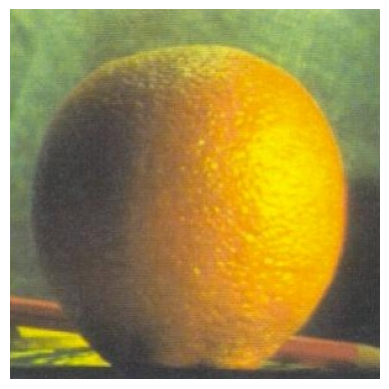

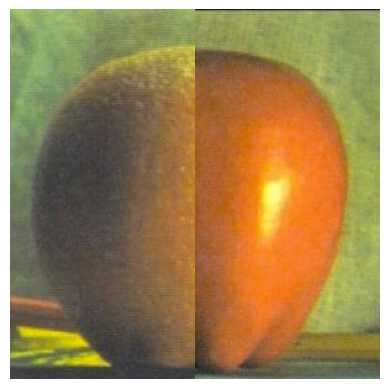

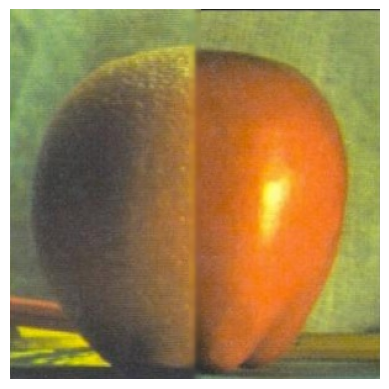

In [30]:
########################### Part 4 Task 1 #################################

# Load images
Apple = cv2.imread('/Users/fneba/apple.jpeg', cv2.IMREAD_COLOR)
Orange = cv2.imread('/Users/fneba/orange.jpeg', cv2.IMREAD_COLOR)

# Check shape of apple and orange images [ both are (300, 300, 3)]
np.shape(Apple)
np.shape(Orange)

# create mask1 & mask2 same size as image and fill it with 1s 
mask1 = np.ones(Apple.shape[:2], dtype="uint8")
mask2 = np.ones(Orange.shape[:2], dtype="uint8")

# Make left side of mask1 all zeros
mask1[:, :150] = 0

# Make right side of mask2 all zeros
mask2[:, 150:] = 0

# masked images
masked_apple = cv2.bitwise_and(Apple, Apple, mask=mask1)
masked_orange = cv2.bitwise_and(Orange, Orange, mask=mask2)

# Direct Blend
Direct_Orapple = masked_apple + masked_orange

# convert to BGR
Apple_rgb = cv2.cvtColor(Apple, cv2.COLOR_BGR2RGB)
masked_apple_rgb = cv2.cvtColor(masked_apple, cv2.COLOR_BGR2RGB)
Orange_rgb = cv2.cvtColor(Orange, cv2.COLOR_BGR2RGB)
masked_orange_rgb = cv2.cvtColor(masked_orange, cv2.COLOR_BGR2RGB)
Direct_Orapple_rgb = cv2.cvtColor(Direct_Orapple, cv2.COLOR_BGR2RGB)

# Display Apple, Orange, and Direct Orapple
plt.imshow(Apple_rgb)
plt.axis('off')
plt.show()

plt.imshow(Orange_rgb)
plt.axis('off')
plt.show()

plt.imshow(Direct_Orapple_rgb)
plt.axis('off')
plt.show()

# Alpha Blending (Source: https://note.nkmk.me/en/python-opencv-numpy-alpha-blend-mask/)
area_to_be_blended = Direct_Orapple[0:300, 145:155]
alpha_blend = cv2.GaussianBlur(area_to_be_blended, (9,9), 0)
Direct_Orapple[0:300, 145:155] = alpha_blend
Alpha_Orapple_rgb = cv2.cvtColor(Direct_Orapple, cv2.COLOR_BGR2RGB)

# Display Alpha Orapple
plt.imshow(Alpha_Orapple_rgb)
plt.axis('off')
plt.show()

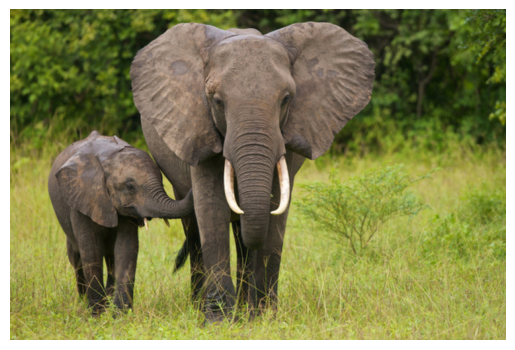

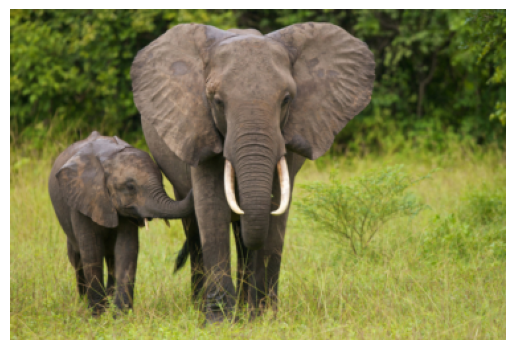

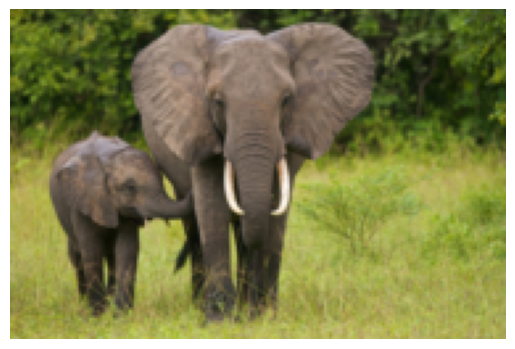

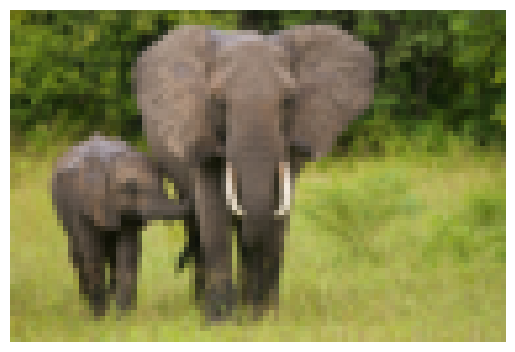

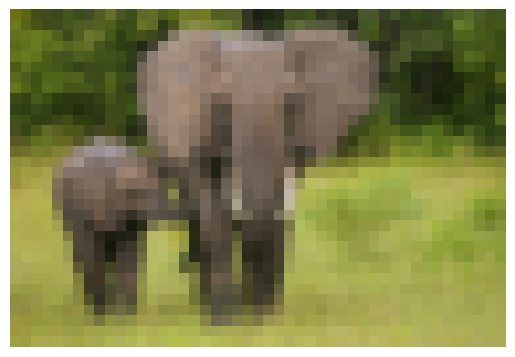

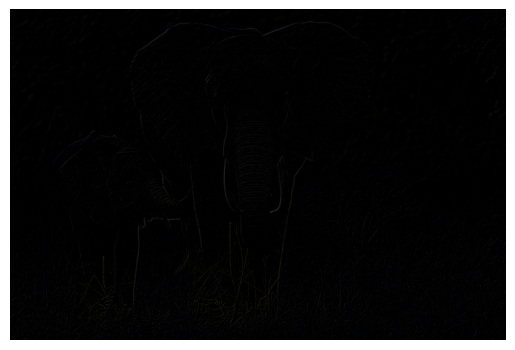

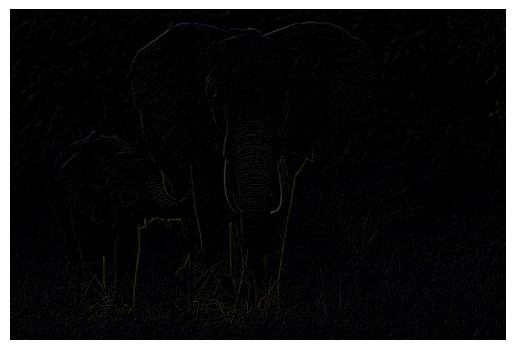

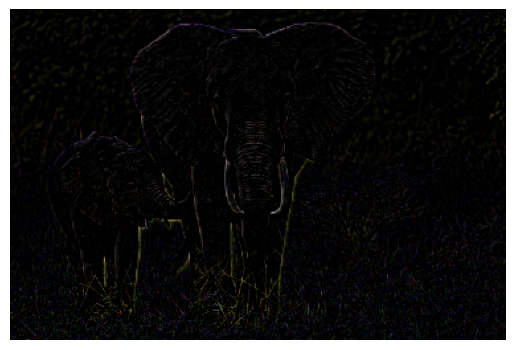

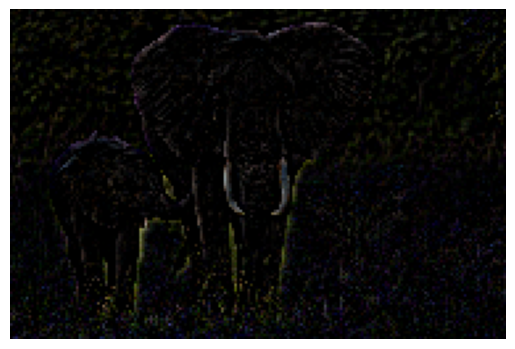

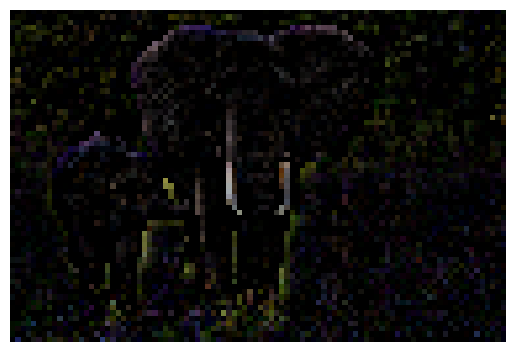

In [34]:
########################### Part 4 Task 2 #################################

# Gaussian and Laplacian Pyramids

# Custom functions for each functionality of the pyramid(s)

def downsample(image):
    # skip rows and columns, removing them to downsample
    return image[::2, ::2]

def upsample(image, imageSize):
    # the factor by with we will resize (the factor is determined by the sizing of the image you put as second input)
    sizing_factor = (imageSize.shape[1],imageSize.shape[0])
    
    # upsize and smooth
    upsized_image = cv2.resize(image, sizing_factor, interpolation=cv2.INTER_NEAREST)
    upsampled = cv2.GaussianBlur(upsized_image, (5,5), 0)
    
    return upsampled

# Gaussian Pyramid on slides only includes the encoding phase not a decoding phase
def GaussianPyramid(image):
    pyramid = []
    GP_image = image
    for i in range(5):
        GP_image = downsample(blur(GP_image))
        pyramid.append(GP_image)
    return pyramid   

def LaplacianPyramid(image):
    pyramid = []
    LP_image = image
    for i in range(5):
        downsampled_image = downsample(LP_image)
        # upsampled downsample to compute laplacian
        upsampled_di = upsample(downsampled_image, LP_image)
        laplacian_image = cv2.subtract(LP_image, upsampled_di)
        pyramid.append(laplacian_image)
        LP_image = downsampled_image
    return pyramid

elephant_image = cv2.imread('/Users/fneba/elephant.jpeg', cv2.IMREAD_COLOR)

# Convert loaded image to RGB
elephant = cv2.cvtColor(elephant_image, cv2.COLOR_BGR2RGB)

# compute pyramids and print results at each step
Gauss = GaussianPyramid(elephant)
for image in Gauss:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Laplace = LaplacianPyramid(elephant)
for image in Laplace:
    plt.imshow(image)
    plt.axis('off')
    plt.show()
